# K-Means

<img src="./figures/kmeans.jpg" width="700px"/>

## Market Segmentation

Le but de ce projet est de **clusteriser les clients** d'un centre commercial en fonction de certaines données personnelles: âge, sexe, revenu annuel et spending score.

Pour plus de précision sur les data, voir le lien suivant:<br>
https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

## Exercice


### Load Data
1. Loadez et examinez les data.<br>
   ```
   df = pd.read_csv('./data/mall_customers.csv')
   ```


### Data Analysis
2. Supprimez la colonne `CustomerID`.


3. Examinez les correlations entre les variables de votre dataset.


4. Encodez la variable discrète `Gender` de manère *1-hot*: `df = pd.get_dummies(df)`


5. Normalisez les data en utilisant un `Normalizer()`:<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html


### Model
6. Fittez un $K$-means sur vos data, avec $K=3$.<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans


7. Fittez plusieurs $K$-means sur vos data, pour $K=2,\dots,20$.<br>
    Faites les grrphe de l'inertie de vos modèles `kean._inertia` en fonction de $K$.<br>
    La meilleure $K$ valeur de $K$ est celle pour laquelle on a un coude dans ce graphe (**Elbow method**):<br>
    https://www.scikit-yb.org/en/latest/api/cluster/elbow.html


8. Déterminer visuellement la meilleure valeur de $K$ grâce à la Elbow method.<br>
    Fittez un $K$-means sur vos data avec cette meilleure valeur de $K$.<br>
    Vos résultats ae sont-ils améliorés?


9. Effectuez une **analyse par composantes principales (principal component analysis PCA)** en 2 dimensions de vos data.<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
    Faites le graphe des data projetées que vous obtenez.<br>
    Sur votre graphe, coloriez vos points en fonction de leurs appartenances à différents clusters calculées par votre $K$-means.

## Librairies

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

In [2]:
df = pd.read_csv('./data/mall_customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

## Data Analysis

### Generalities

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
# drop CustomerID column
df = df.drop(columns=["CustomerID"])

In [8]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
# column types
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
# check for missing values
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Correlations

<AxesSubplot:>

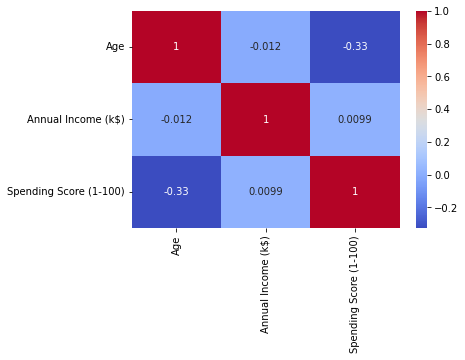

In [11]:
# correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

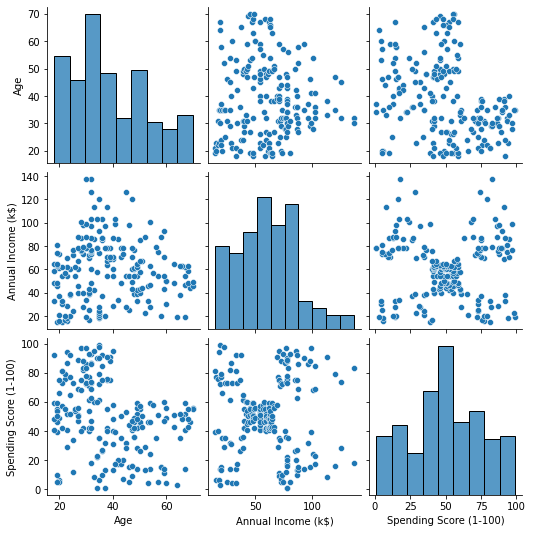

In [12]:
# pairwise correlations
sns.pairplot(df)

- Les variables n'ont pas l'air spécialement corrélées
- Le plot *Annual Income vs Spending Score* semble révéler des clusters.

### 1-hot encoding of discrete variables

In [13]:
df = pd.get_dummies(df)

In [14]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


## Model

### Fit a K-means

In [15]:
# normalize data
normalizer = Normalizer()
X = normalizer.fit_transform(df)

In [16]:
X.shape

(200, 5)

In [17]:
# instanciate and fit model
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

### Fit a PCA and plot clustered data

In [18]:
# do a PCA of dimension 2 to plot the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(200, 2)

Text(0.5, 1.0, 'Plot data along wo first PCA dimensions')

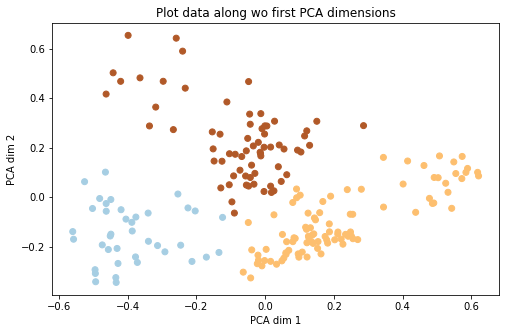

In [19]:
# targets vs predictions
plt.figure(figsize=(8, 5))

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="Paired")
plt.xlabel("PCA dim 1")
plt.ylabel("PCA dim 2")
plt.title("Plot data along wo first PCA dimensions")

### Elbow method to determine optimal number of clusters

In [20]:
inertia = list()
n_cluster = range(2, 20)

for n in n_cluster:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'K-means inertia vs number of clusters')

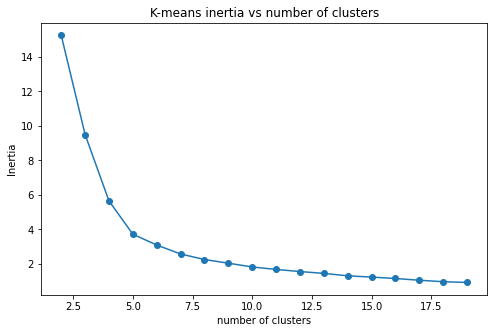

In [21]:
# targets vs predictions
plt.figure(figsize=(8, 5))

plt.plot(n_cluster, inertia, marker="o", linestyle="-")
plt.xlabel("number of clusters")
plt.ylabel("Inertia")
plt.title("K-means inertia vs number of clusters")

The **elbow** accours at $n = 5$ clusters.

### Re-fit a K-means with optimal number of clusters

In [22]:
# instanciate and fit model
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(X)

In [23]:
# do a PCA of dimension 2 to plot the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(200, 2)

Text(0.5, 1.0, 'Plot data along two first PCA dimensions')

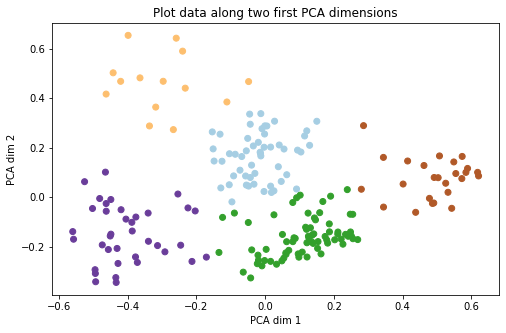

In [24]:
# targets vs predictions
plt.figure(figsize=(8, 5))

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="Paired")
plt.xlabel("PCA dim 1")
plt.ylabel("PCA dim 2")
plt.title("Plot data along two first PCA dimensions")